In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install gensim

In [ ]:
import gensim
from gensim import corpora, models
from ast import literal_eval
import pandas as pd
import csv
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from nltk.corpus import stopwords
import numpy as np
import nltk
from nltk import ngrams

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nlp_project/data/result.csv')

In [ ]:
df.head(10)

result
0       друг мой соответствовать готовый сделать себя ...
1       сказать честно сон храпеть понятие иметь вроде...
2       поссориться муж пока спасть мысленно развестис...
3       посещать мысль смерть это полбеды беда это сме...
4             говорить получиться сдаться доказать правый
...                                                   ...
122076  последний раскрытый громкий преступление киев ...
122077  бесконечный количество российский футболист за...
122078  чемпионат мир футбол россия нужно юлий самойло...
122079  цель профилактика весна следовать чеснок женщи...
122080  мой глаз както два девушка затаскивать кавказе...

[122081 rows x 1 columns]

#Попробуем сделать кластеризацию по темам с помощью LDA.

Для начала добавим биграммы к текстам, создадим словарь и отфильтруем редкие и слишком частые слова

In [ ]:
documents = df["result"].values
tokenized_documents = [doc.split() for doc in documents]

bigram = models.Phrases(tokenized_documents, min_count = 3, threshold = 4)

bigram_mod = models.phrases.Phraser(bigram)

def make_bigrams(texts):
  return [bigram_mod[doc] for doc in texts]

result_texts = make_bigrams(tokenized_documents)

dictionary = gensim.corpora.Dictionary(result_texts)
print('Размер словаря до фильтрации: {}'.format(len(dictionary)))
print(dictionary)
dictionary.filter_extremes(no_below=2, no_above=0.2)
dictionary.compactify()
print('Размер словаря после фильтрации: {}'.format(len(dictionary)))
print(dictionary)

dictionary_witout_bigrams = gensim.corpora.Dictionary(tokenized_documents)
dictionary_witout_bigrams.filter_extremes(no_below=2, no_above=0.4)
dictionary_witout_bigrams.compactify()
print('Размер словаря без биграм после фильтрации: {}'.format(len(dictionary_witout_bigrams)))
print(dictionary_witout_bigrams)

Размер словаря до фильтрации: 79541
Dictionary<79541 unique tokens: ['готовый', 'друг', 'мой', 'немного', 'плохой']...>
Размер словаря после фильтрации: 45636
Dictionary<45636 unique tokens: ['готовый', 'друг', 'мой', 'немного', 'плохой']...>
Размер словаря без биграм после фильтрации: 31142
Dictionary<31142 unique tokens: ['готовый', 'друг', 'мой', 'немного', 'плохой']...>


Векторизуем данные и сохраняем в бинарном формате

In [ ]:
corpus = [dictionary.doc2bow(text) for text in result_texts]

In [ ]:
import pickle
with open('/content/drive/MyDrive/nlp_project/data/corpus', 'wb') as f:
  pickle.dump(corpus, f)

Обучим модель пока что без настройки гиперпараметров. num_topics = 15 интуитивно. Также сохраним для каждого из топиков топ100 наиболее вероятных для его слов.

In [ ]:
lda_model = models.ldamodel.LdaModel(
    corpus = corpus,
    id2word = dictionary,
    num_topics = 20,
    passes = 5
)

lda_model.save('/content/drive/MyDrive/nlp_project/data/lda_model_20_withBigrams')

topics = lda_model.show_topics(
    num_topics = 20,
    num_words = 100,
    formatted = False
)

with open('/content/drive/MyDrive/nlp_project/data/lda_model_20_withBigrams_tops', 'wb') as f:
  pickle.dump(topics, f)

In [ ]:

def plotWordCloud_Gensim(topic_number,topics):
    text = dict(topics[topic_number][1])
    wordcloud = WordCloud(background_color="white", max_words=100, width=700, height=700, collocations=False)
    wordcloud = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(8, 8))
    plt.title(f" номер {topic_number}")
    plt.savefig(f'/content/drive/MyDrive/nlp_project/data/pic_{topic_number}')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");


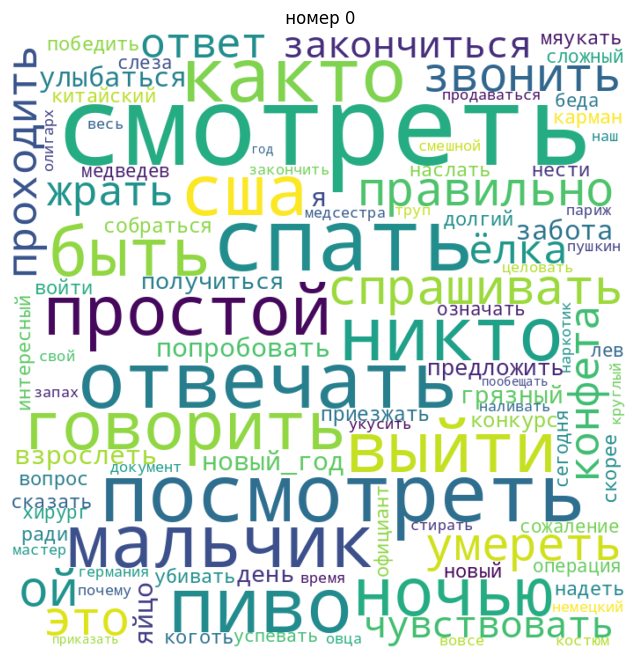

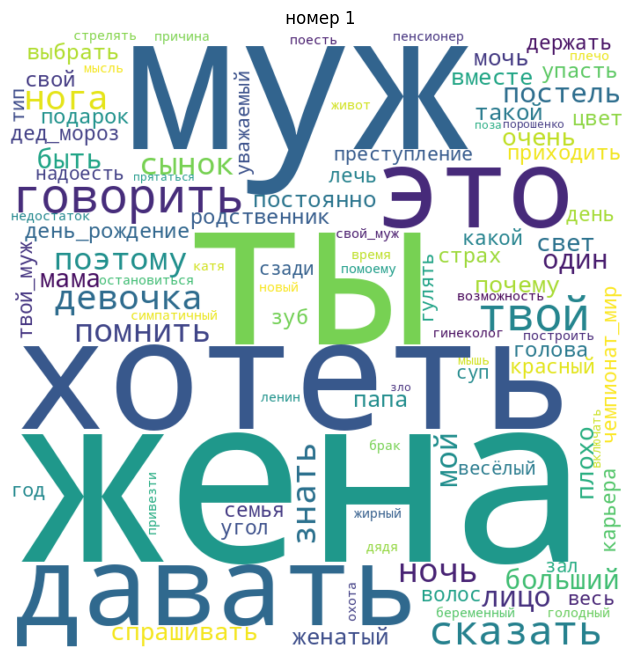

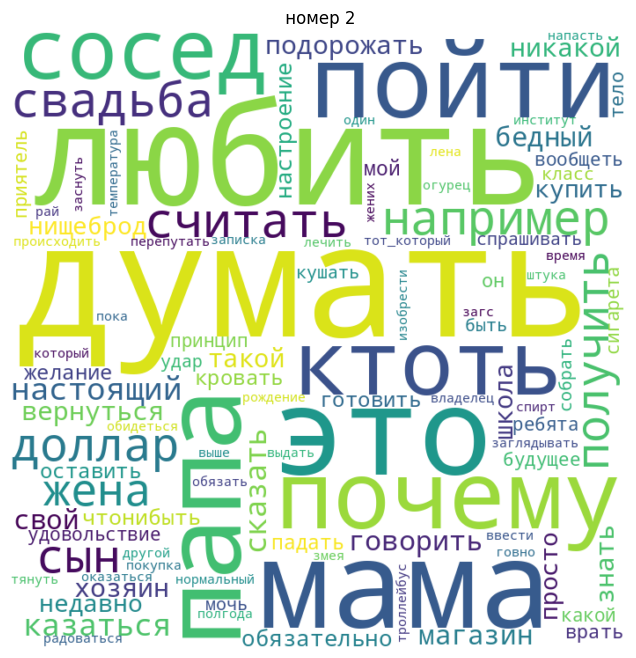

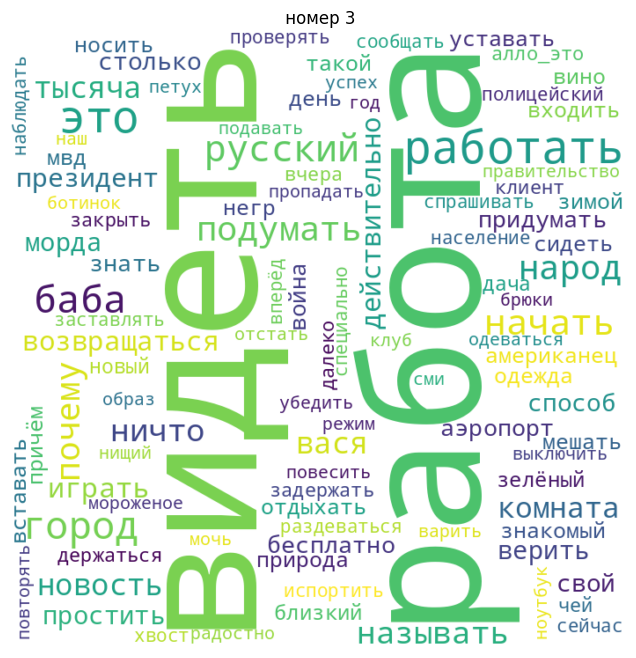

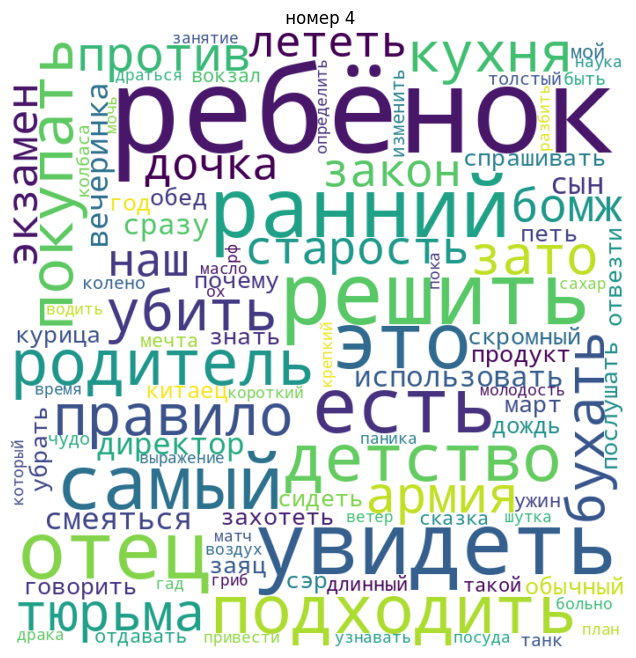

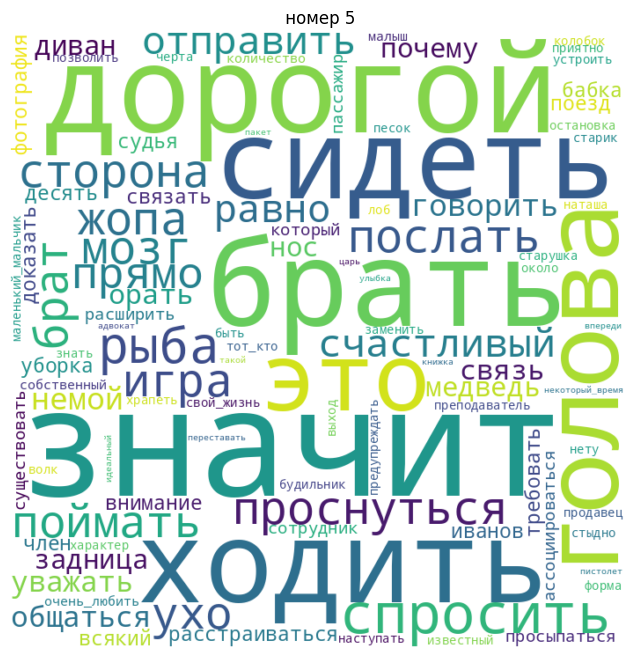

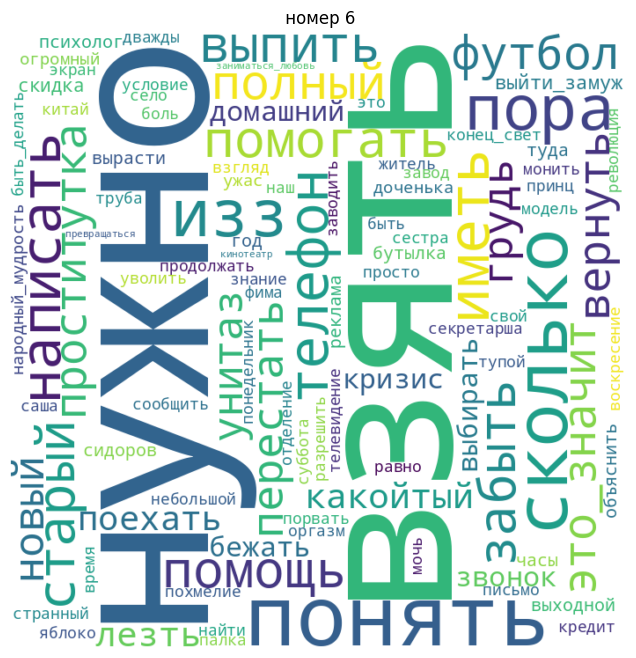

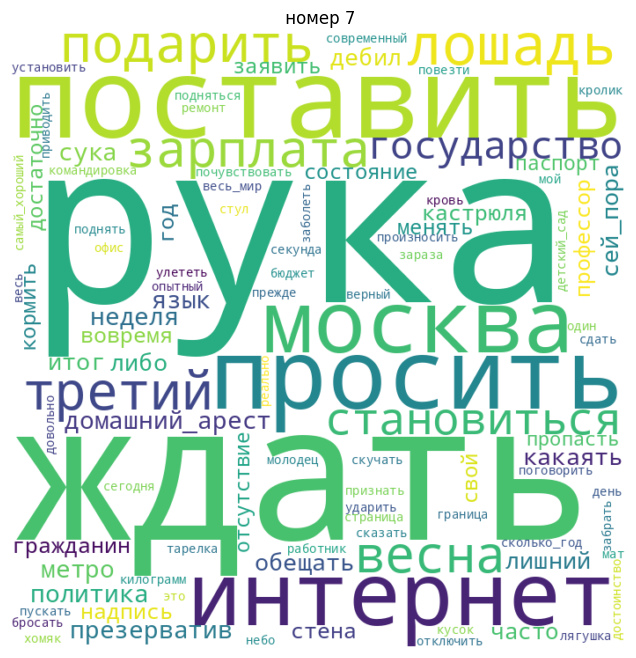

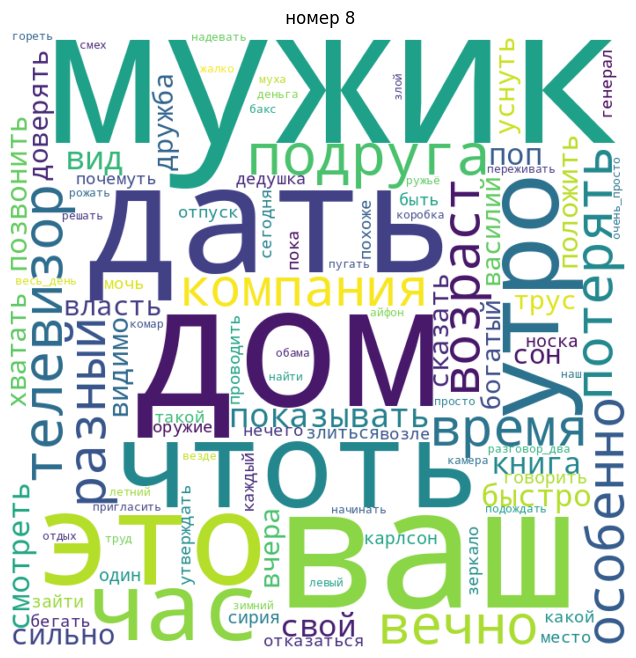

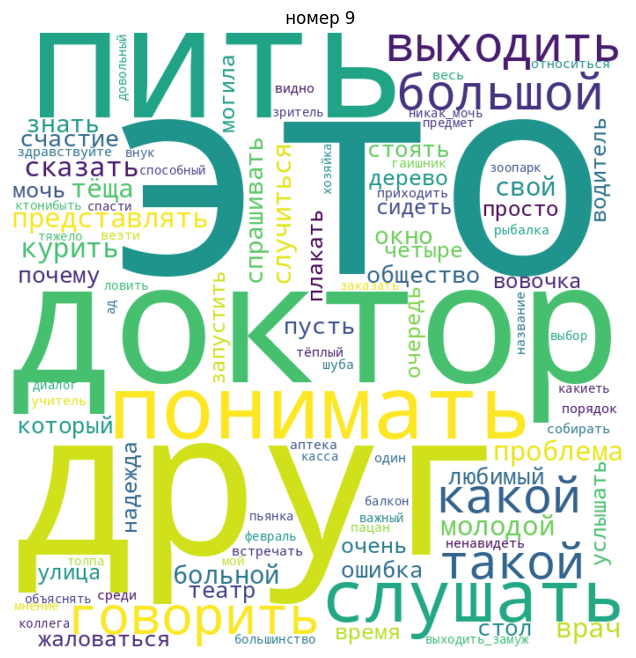

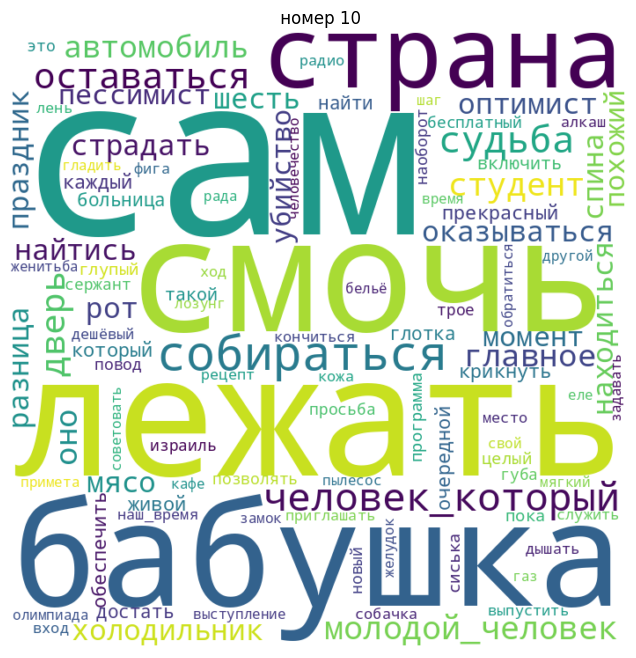

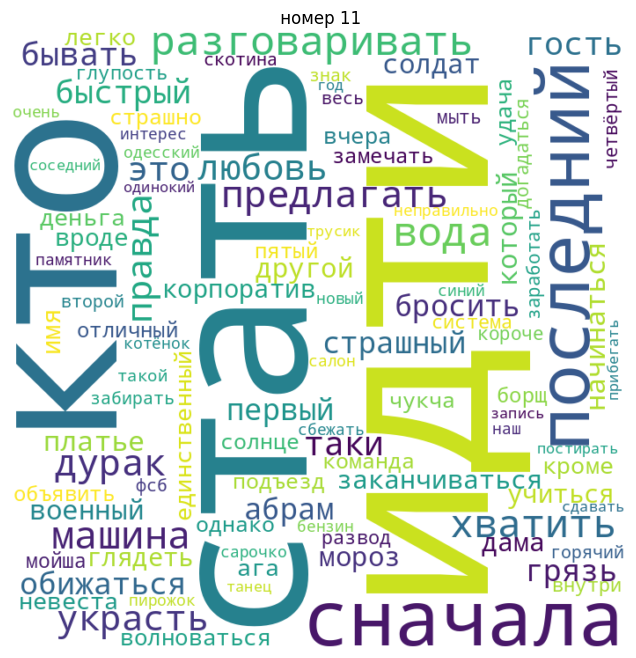

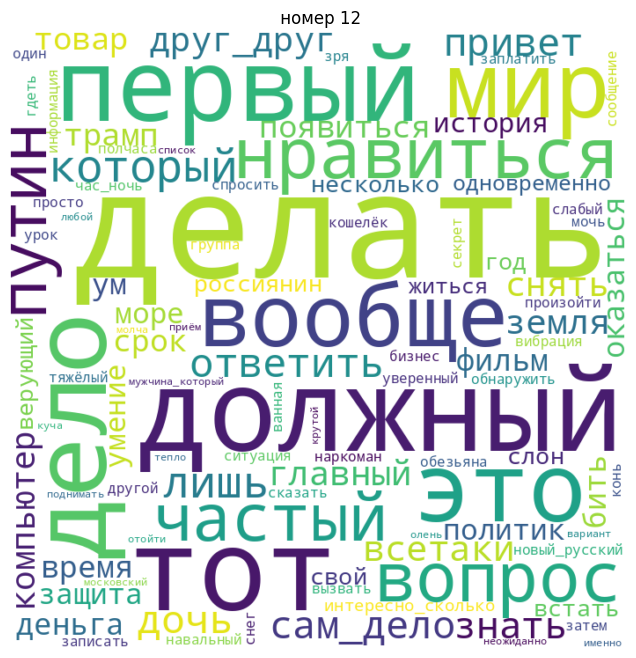

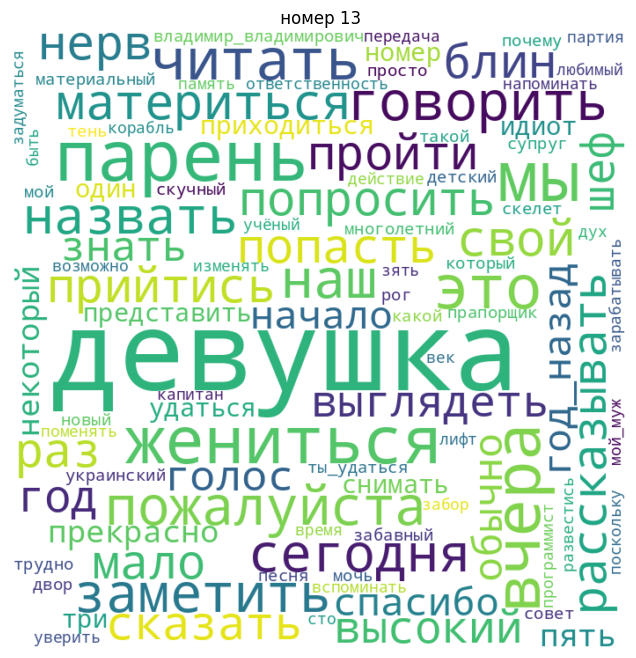

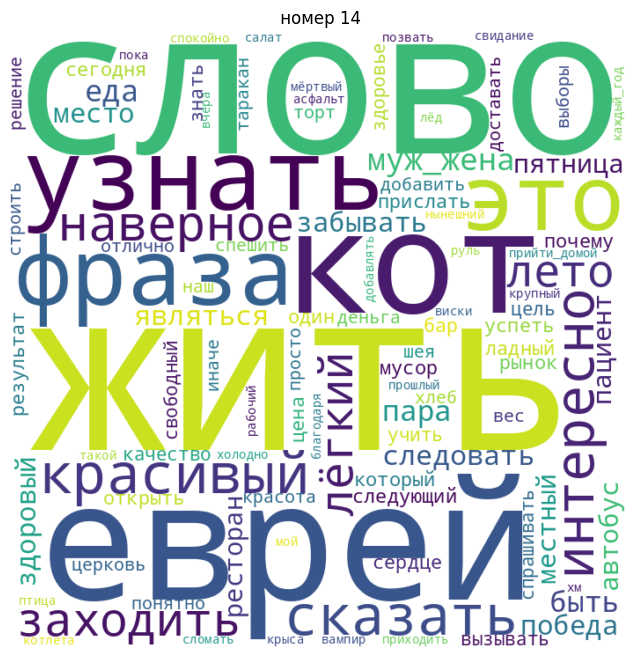

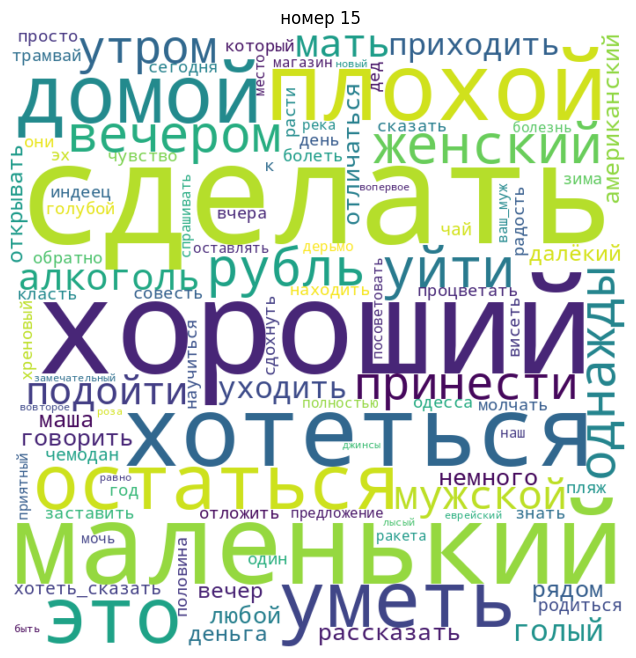

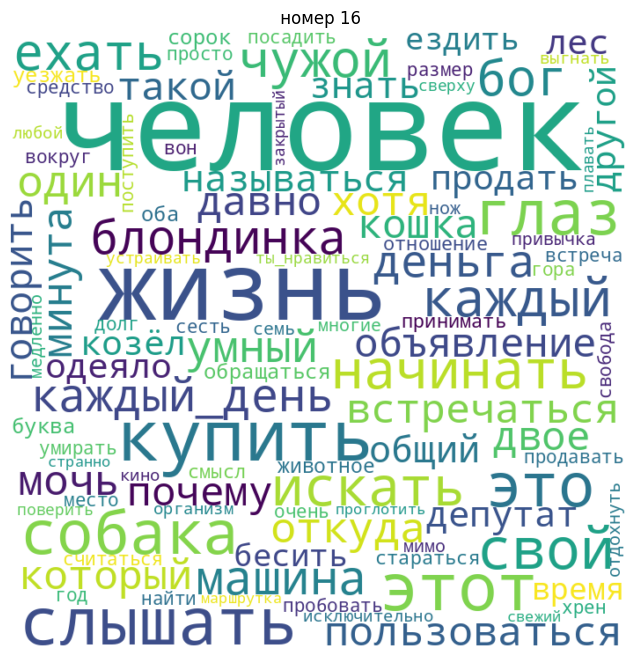

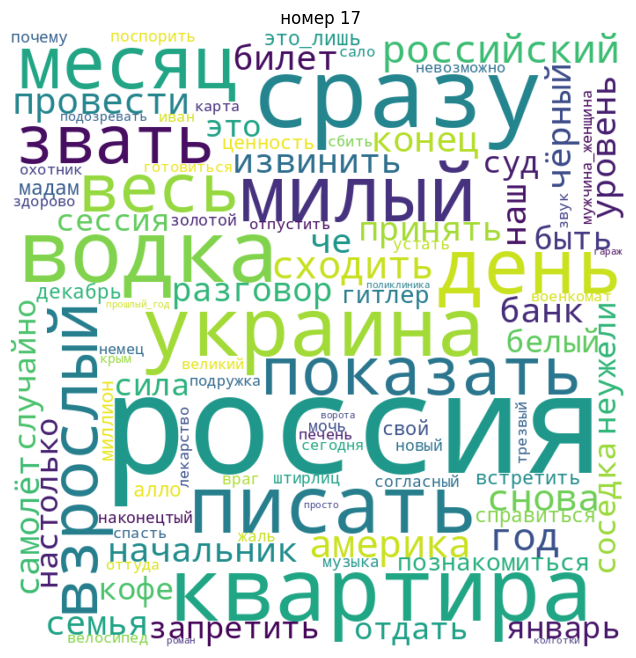

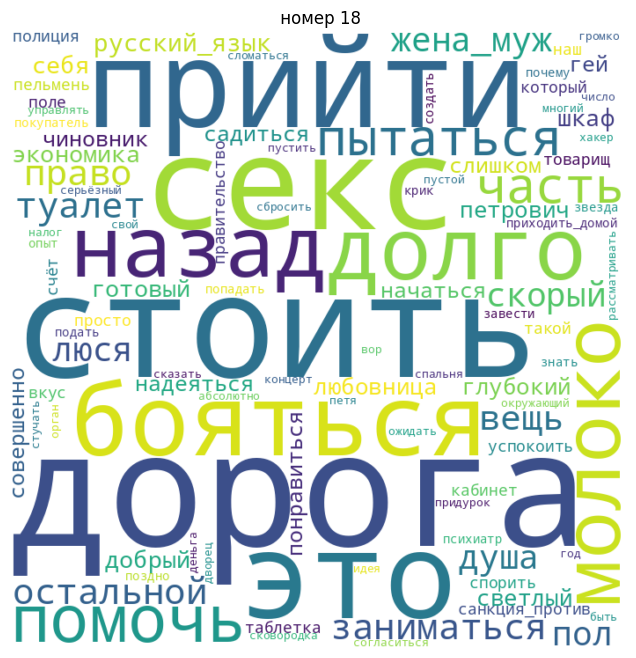

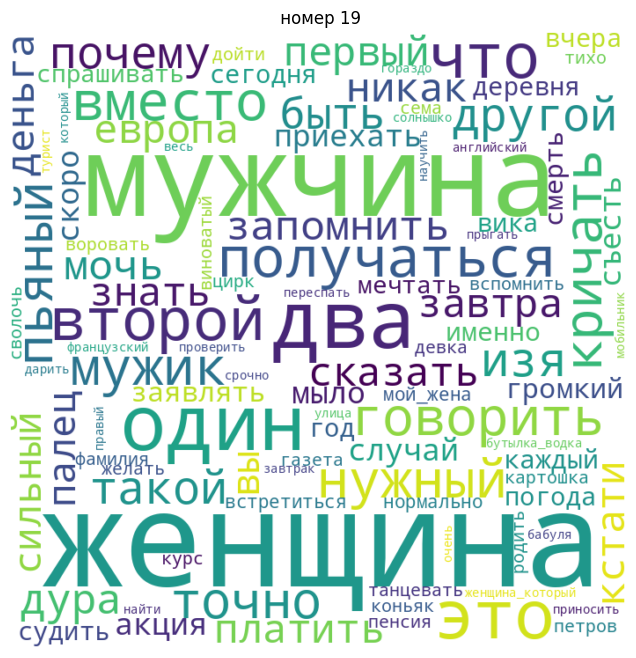

In [ ]:
for i in range (0,20):
  plotWordCloud_Gensim(i, topics)

In [ ]:
!pip3 install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.8 MB/s eta 0:00:00


In [ ]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis_base = gensimvis.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis_base

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.206018  0.093744       1        1  7.231294
16    -0.065576 -0.158239       2        1  5.947967
9     -0.158828 -0.011779       3        1  5.843429
19    -0.110286 -0.077660       4        1  5.773872
2     -0.183169  0.037469       5        1  5.523730
12     0.006038 -0.139481       6        1  5.272266
13    -0.058939  0.047333       7        1  5.267237
15    -0.003080 -0.010966       8        1  5.072161
8     -0.063985 -0.024525       9        1  5.057955
4     -0.001892  0.079148      10        1  4.877208
0     -0.000805  0.134790      11        1  4.756704
3      0.013761  0.057625      12        1  4.711899
17     0.163085  0.213976      13        1  4.707614
14    -0.033174  0.015626      14        1  4.586134
6      0.212498  0.049770      15        1  4.400898
5      0.024012  0.004115      16        1  4.389147
11     0.109554 -0.214302      17        1  4.368588
18     0.056617 -0.027244      18        1  4.303739
7      0.138966  0.089238      19        1  4.066157
10     0.161220 -0.158636      20        1  3.842000, topic_info=           Term         Freq        Total Category  logprob  loglift
32      женщина  7311.000000  7311.000000  Default  30.0000  30.0000
78      человек  7387.000000  7387.000000  Default  29.0000  29.0000
14         жена  8282.000000  8282.000000  Default  28.0000  28.0000
309     девушка  5303.000000  5303.000000  Default  27.0000  27.0000
62      мужчина  5088.000000  5088.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
4465        рот   427.605408   428.908160  Topic20  -4.6123   3.2561
1903   праздник   417.845917   419.148668  Topic20  -4.6354   3.2561
3276  пессимист   399.520330   400.823081  Topic20  -4.6802   3.2559
419      момент   392.392324   393.695076  Topic20  -4.6982   3.2559
1240   убийство   386.640644   387.943395  Topic20  -4.7130   3.2558

[748 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1365     17  0.998109       абрам
1259     14  0.996609     автобус
3854     20  0.996803  автомобиль
3747      4  0.996205       акция
1011      8  0.998232    алкоголь
...     ...       ...         ...
4391     11  0.998009           я
666      14  0.997639    являться
925      19  0.996925        язык
1385     11  0.998152        яйцо
4157     11  0.998242        ёлка

[1027 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 17, 10, 20, 3, 13, 14, 16, 9, 5, 1, 4, 18, 15, 7, 6, 12, 19, 8, 11])